<h2>Import Library</h2>

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers, models

In [4]:
# Print versions
!python --versions
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)

unknown option --versions
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy 1.25.2
TensorFlow 2.15.0


<h2>Import Data Log</h2>

In [5]:
PATH = "./drive/MyDrive/Research/Lidar_Classification/"
files = os.listdir(PATH)
print(files)

['log_center.txt', 'log_right.txt', 'log_left.txt']


<h2>Load Data</h2>

In [6]:
############
#Class :
#- Center = 0
#- Right = 1
#- Left  = 2
############
def load_data(path,class_name):
  with open(path, 'r') as file:
      lines = file.readlines()
      data = []
      label = []
      for line in lines:
          values = [float(val) for val in line.strip().split(',')]
          data.append(values)
          label.append(class_name)
  return (np.array(data),label)

df_center, label_center = load_data(PATH+files[0],0)
df_right, label_right = load_data(PATH+files[1],1)
df_left, label_left = load_data(PATH+files[2], 2)

In [9]:
print(df_center,label_center)

[[  5.88886535 111.34161451 110.24507987 ... 109.16806719 109.2439367
  110.3398308 ]
 [  5.88886535 110.33468988 109.23955704 ... 108.16376659 108.23836602
  109.33285171]
 [  5.88886535 110.33468988 109.23955704 ... 107.15948942 108.23836602
  109.33285171]
 ...
 [  5.88886535 110.33468988 109.23955704 ... 107.15948942 107.23281884
  108.32589553]
 [  5.88886535 110.33468988 109.23955704 ... 107.15948942 107.23281884
  108.32589553]
 [  5.88886535 110.33468988 109.23955704 ... 107.15948942 107.23281884
  108.32589553]] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [10]:
X = np.concatenate([df_center, df_right, df_left])
Y = np.concatenate([label_center, label_right, label_left])

In [12]:
X.shape, Y.shape

((6000, 160), (6000,))

<h2>Data Split</h2>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, y_train.shape

((4800, 160), (4800,))

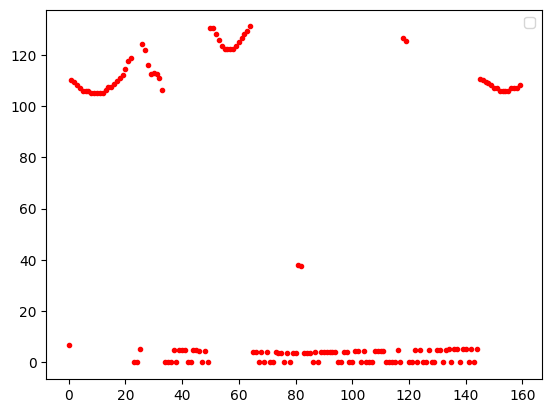

In [62]:
plt.plot(X_train[5],'.r')
plt.legend()
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
def build_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 3 kelas: tengah, kanan, kiri

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [53]:
# Fungsi untuk melatih model
def train_model(model, X_train, y_train, epochs=10):
    history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)
    return history

In [54]:
# Membangun model
input_shape = (X_train.shape[1],)
model = build_model(input_shape)

# Melatih model
hist = train_model(model, X_train_scaled, y_train, epochs=20)

Epoch 1/20
120/120 [==============================] - 1s 3ms/step - loss: 0.0779 - accuracy: 0.9771 - val_loss: 0.0134 - val_accuracy: 0.9990
Epoch 2/20
120/120 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.9990
Epoch 3/20
120/120 [==============================] - 0s 1ms/step - loss: 3.6478e-04 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 0.9990
Epoch 4/20
120/120 [==============================] - 0s 2ms/step - loss: 1.9333e-04 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 0.9990
Epoch 5/20
120/120 [==============================] - 0s 2ms/step - loss: 1.2156e-04 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9990
Epoch 6/20
120/120 [==============================] - 0s 2ms/step - loss: 8.3750e-05 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9990
Epoch 7/20
120/120 [==============================] - 0s 2ms/step - loss: 6.1366e-05 - accuracy: 1.0000 - val_loss: 0.0134 - val_acc

In [27]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

38/38 [==============================] - 0s 971us/step - loss: 1.0749e-05 - accuracy: 1.0000
Test Accuracy: 100.00%


In [52]:
data_test = np.array([5.945714701724766,0,165.57183617657964,165.42583142668633,5.428749061569602,5.414398363332134,108.02071849821927,107.00280918718755,105.0017121783218,103.01825417312743,102.0508810541506,101.09991403423746,100.16537356775912,99.24726703333221,99.34461776889658,99.45933279502847,99.59191574141809,99.74287681156372,99.91273250853975,100.10200534874643,100.31122356516985,100.54092080186405,101.79999018119089,103.08482872883086,104.39666151711577,105.73674207437796,107.10635229882963,5.055813352323214,0,5.01854064183178,0,0,0,0,0,0,0,4.860095636738915,0,4.817967539367538,4.796499408727395,4.774754955371732,0,111.90398383956659,116.10877104428444,118.14934655574123,117.97622294523524,117.82148124148603,4.6143374695147,0,0,4.5408582538806685,4.515686630623995,0,139.1425034829694,139.3386609492723,137.0676010397012,133.50625951503784,131.15221470767906,130.0433588484409,130.22025498199778,130.41119907107804,129.2848838460525,128.13903904003968,128.33469971622668,128.54050889387287,128.7556887286246,128.97944786829774,132.08005141920157,0,3.9944822826865973,0,0,3.89283008838383,3.857838560808834,3.822270492843074,78.34873183552274,79.45682904532462,83.89343427196086,96.83602752265624,123.68076291846891,0,3.7139707932598776,37.16812284932135,3.7880551539715146,3.824182244219703,0,3.894680378195174,0,3.962930445739182,3.9962457921308574,4.029038289837462,4.061320151353296,4.093103211771528,4.124398943250895,0,0,4.215471727213927,4.2449260761503815,0,0,4.330717398480374,4.3584882256786885,0,4.412843412128965,0,0,0,4.517037916052128,4.542191017495577,115.0602180595856,114.02319244266748,113.02215775955534,110.91420636254648,109.99263031846746,107.98071772674402,107.13480934520682,106.32127325169874,106.63932622336513,106.97376560145031,107.3250537258475,107.69362893808207,109.15201527842767,109.55027896306346,109.96731364122934,111.45820586241625,114.0077750527922,118.64741100048292,122.23109026937385,123.73928850287061,5.000585878721436,5.019546136518136,0,5.056795246213487,5.075091976714749,0,5.111048800188025,5.128716234552549,0,5.163446874326768,5.180516928936709,0,5.21408305483923,0,5.246905076711544,5.263044738296187,0,5.294796155206137,0,5.325862675838405,0,5.356266224145301,110.00041365836854,109.00422654653715,106.0196889675595,105.04892765473305,104.09018390601803,103.14262859070641,102.20545954940532,102.28467745969769])
scaled_data_test = scaler.transform(data_test.reshape(1, -1))
scaled_data_test

array([[-7.69711821e-01, -6.94877296e-01,  1.24361660e+00,
         1.20308592e+00, -1.14211173e+00, -1.20261317e+00,
         1.44437898e-01,  4.66266940e-01,  1.87340601e-02,
        -5.24429445e-01, -6.01418228e-01, -6.37617139e-01,
        -9.15100467e-01, -5.18535162e-01, -4.21354420e-01,
        -3.56596988e-01, -2.65049140e-01, -1.18863406e-01,
        -1.01465904e-01, -1.21534457e-01, -1.48090303e-01,
        -1.88848779e-01,  1.15239810e-01,  7.08963461e-01,
         6.96406401e-01,  6.78039783e-01,  3.08698398e-01,
        -1.22126974e+00, -6.94836489e-01, -6.94876993e-01,
        -6.94877296e-01, -6.94877184e-01, -6.94875269e-01,
        -6.94868702e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.11226608e-13,  0.00000000e+00,
         4.71622741e-13,  3.55271368e-13,  2.06057393e-13,
         0.00000000e+00,  1.42696838e+00,  1.42716716e+00,
         1.41964286e+00,  1.41911136e+00,  1.48733939e+00,
        -1.32631918e-01, -1.31011344e-01, -1.38226499e+0

In [50]:
prediction = model.predict(scaled_data_test)
prediction

1/1 [==============================] - 0s 15ms/step


array([[5.5027988e-07, 2.9215221e-07, 9.9999917e-01]], dtype=float32)

In [63]:
model.save("ydlidargs2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [66]:
! pip install "everywhereml>=0.2.32"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 874.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.1 MB/s eta 0:00:00
  Created wheel for everywhereml: filename=everywhereml-0.2.37-py3-none-any.whl size=81193 sha256=38d253e0b67cf6ecb5bace0712c1a60059208565d16fb292d97e262e5514f2fe
  Stored in directory: /root/.cache/pip/wheels/f0/08/8c/4848a3a49c6b89689c1366cca928db3058dd1f414b03055f15
  Created wheel for hexdump: filename=hexdump-3.3-py3-none-any.whl size=8894 sha256=5d58ec66c26aac385e38920dbd358adcda4258cf17bf264b3b1e507c43347963
  Stored in directory: /root/.cache/pip/wheels/26/28/f7/f47d7ecd9ae44c4457e72c8bb617ef18ab332ee2b2a1047e87
  Created wheel for umap-lear

In [70]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("ydlidargs2" + '.tflite', 'wb').write(tflite_model)

15344

In [71]:

# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str


In [72]:

# Write TFLite model to a C source (or header) file
with open("ydlidargs2" + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, "ydlidargs2"))